In [23]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [3]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [4]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    num_samples, num_feature = data.shape
    return data[np.random.choice(num_samples, k)]
    
   

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [5]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    distance_list = []
    num_cluster, _ = mu.shape
    for k_th in range(num_cluster):
        sum_squares = np.sum(np.square(data - mu[k_th, :]), axis=1)
        distance_list.append(sum_squares)
    return np.array(distance_list).T

#### Update k-means parameters

In [6]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    k = mu_old.shape[0]
    n_samples, n_features = data.shape
    
    dist_matrix = build_distance_matrix(data,mu_old)
    losses = np.min(dist_matrix,axis=1)
    assignments = np.argmin(dist_matrix,axis=1)
    
    mu = np.empty((k,n_features))
    
    # Compute the new mu
    for k_th in range(k):
        # get the indices of the points assigned to cluster k 
        indices_cluster_k = np.where(assignments == k_th)
        # get the points assigned to cluster k
        cluster = data[indices_cluster_k,:]
        # Compute the mean
        mu[k_th,:]= np.mean(np.squeeze(cluster),axis=0)
   
    
    return losses, assignments, np.nan_to_num(mu)


#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 62.26842376470589.


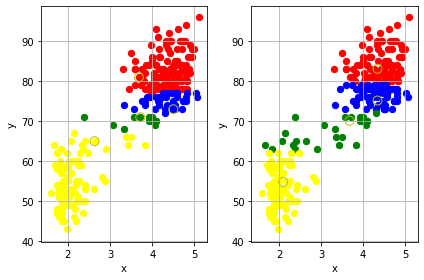

The current iteration of k-means is: 1,                the average loss is 16.323608797314726.


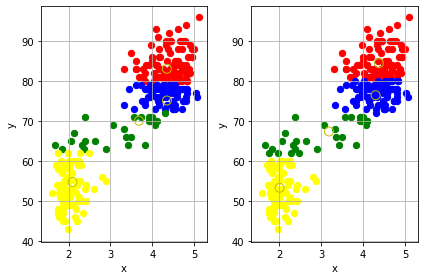

The current iteration of k-means is: 2,                the average loss is 12.915182743239829.


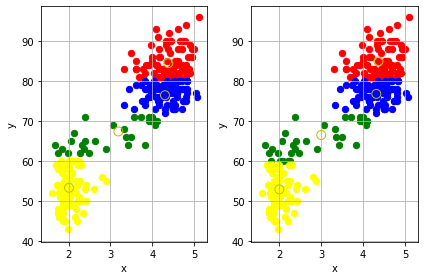

The current iteration of k-means is: 3,                the average loss is 12.509502413453774.


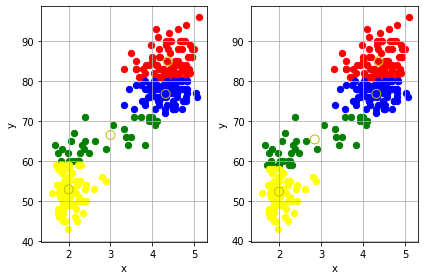

The current iteration of k-means is: 4,                the average loss is 12.172940048831771.


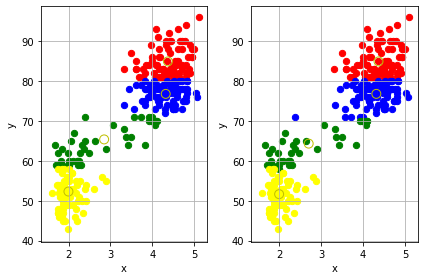

The current iteration of k-means is: 5,                the average loss is 11.670209854911391.


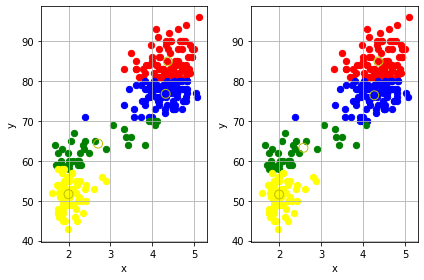

The current iteration of k-means is: 6,                the average loss is 11.235746332609384.


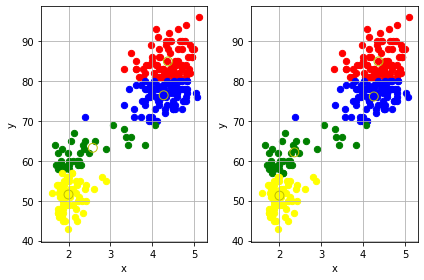

The current iteration of k-means is: 7,                the average loss is 10.923947875647647.


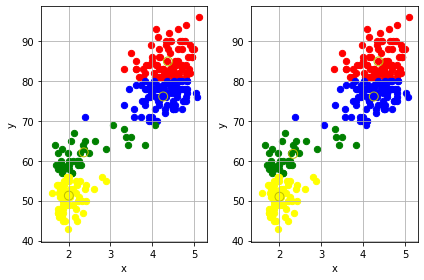

The current iteration of k-means is: 8,                the average loss is 10.860607821273405.


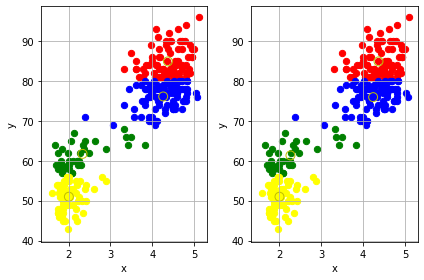

The current iteration of k-means is: 9,                the average loss is 10.830894253182741.


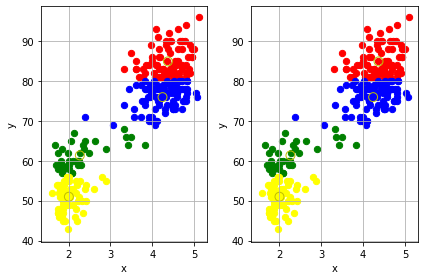

The current iteration of k-means is: 10,                the average loss is 10.830894253182741.


In [24]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu
        

# define parameters
k = 4
max_iters = 20
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [47]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [48]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: make pixel values of each color (which is a matrix) 
    # into a vector. **don't normalize!**
    # ***************************************************  
    width,height,dim = original_image.shape
    processed_image = original_image.reshape((width*height,dim))
    
    return processed_image.astype(float)

processed_image = preprocess_image(original_image)

The current iteration of k-means is: 0,                the average loss is 5323.220902777778.
The current iteration of k-means is: 1,                the average loss is 4184.195897054519.
The current iteration of k-means is: 2,                the average loss is 3699.755217935408.
The current iteration of k-means is: 3,                the average loss is 3368.2475786847876.
The current iteration of k-means is: 4,                the average loss is 3181.0519851669956.
The current iteration of k-means is: 5,                the average loss is 3080.80890268538.
The current iteration of k-means is: 6,                the average loss is 3022.1354815516606.
The current iteration of k-means is: 7,                the average loss is 2987.8806363750414.
The current iteration of k-means is: 8,                the average loss is 2969.977636255507.
The current iteration of k-means is: 9,                the average loss is 2960.9393433584396.
The current iteration of k-means is: 10,                

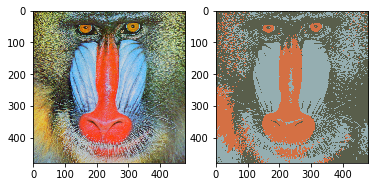

<Figure size 432x288 with 0 Axes>

In [52]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # Take k clusters from the image
    mu_old = initialize_clusters(processed_image,k)
    
    loss_list = []
    
    # start the kmeans algorithm
    for iter in range(max_iters):
         # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
         # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        mu_old = mu
    

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 3
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)